## Ethnicity
This is the Jupyter Notebook that will be used for analyzing ethnicity trends in American Universities.

#### Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/MATH 2327 3439 - Data/'

Mounted at /content/drive


#### Data Prep:

In [6]:
degree_df = pd.read_csv("/content/drive/Shareddrives/MATH 2327 3439 - Data/data/university_graduation/degree completions.csv")

In [5]:
uni_df = pd.read_csv("/content/drive/Shareddrives/MATH 2327 3439 - Data/data/university_graduation/university info.csv", encoding='latin')

In [7]:
degree_df.rename(columns={
    'UNITID': 'institution_id',
    'CSTOTLT': 'total_awards',
    'CSTOTLM': 'awards_men',
    'CSTOTLW': 'awards_women',
    'CSAIANT': 'awards_native_american_total',
    'CSAIANM': 'awards_native_american_men',
    'CSAIANW': 'awards_native_american_women',
    'CSASIAT': 'awards_asian_total',
    'CSASIAM': 'awards_asian_men',
    'CSASIAW': 'awards_asian_women',
    'CSBKAAT': 'awards_black_total',
    'CSBKAAM': 'awards_black_men',
    'CSBKAAW': 'awards_black_women',
    'CSHISPT': 'awards_hispanic_total',
    'CSHISPM': 'awards_hispanic_men',
    'CSHISPW': 'awards_hispanic_women',
    'CSNHPIT': 'awards_pacific_islander_total',
    'CSNHPIM': 'awards_pacific_islander_men',
    'CSNHPIW': 'awards_pacific_islander_women',
    'CSWHITT': 'awards_white_total',
    'CSWHITM': 'awards_white_men',
    'CSWHITW': 'awards_white_women',
    'CS2MORT': 'awards_two_or_more_races_total',
    'CS2MORM': 'awards_two_or_more_races_men',
    'CS2MORW': 'awards_two_or_more_races_women',
    'CSUNKNT': 'awards_unknown_total',
    'CSUNKNM': 'awards_unknown_men',
    'CSUNKNW': 'awards_unknown_women',
    'CSNRALT': 'awards_nonresident_alien_total',
    'CSNRALM': 'awards_nonresident_alien_men',
    'CSNRALW': 'awards_nonresident_alien_women'
}, inplace=True)

In [9]:
uni_df.rename(columns={
    'UNITID': 'institution_id',
    'INSTNM': 'institution_name',
    'CITY': 'city',
    'STABBR': 'state',
    'ZIP': 'zip_code',
    'SECTOR': 'sector',
    'CONTROL': 'control',  # Public/Private
    'HBCU': 'hbcu',  # Historically Black College or University
    'TRIBAL': 'tribal_college',
    'LOCALE': 'locale_code',
    'WEBADDR': 'website',
    'ADMINURL': 'admin_url',
    'FAIDURL': 'faid_url',  # Financial Aid URL
    'INSTSIZE': 'institution_size',
    'CARNEGIE': 'carnegie_classification',
    'LATITUDE': 'latitude',
    'LONGITUD': 'longitude'
}, inplace=True)

In [10]:
merged_df = pd.merge(degree_df, uni_df, on='institution_id')

## Data Work
Here the investigation of data will be done

#### National Averages
General Idea of graduation averages for all ethnicities

In [11]:
group_totals = merged_df[['awards_native_american_total', 'awards_asian_total', 'awards_black_total', 'awards_hispanic_total', 'awards_pacific_islander_total', 'awards_white_total']].sum()
total_awards = merged_df['total_awards'].sum()
national_averages = group_totals / total_awards

print("National averages:")
print(national_averages)

National averages:
awards_native_american_total     0.005818
awards_asian_total               0.064473
awards_black_total               0.113155
awards_hispanic_total            0.172988
awards_pacific_islander_total    0.002540
awards_white_total               0.507541
dtype: float64


#### Control Types
General Idea of where do students graduate more often based on their ethnicity

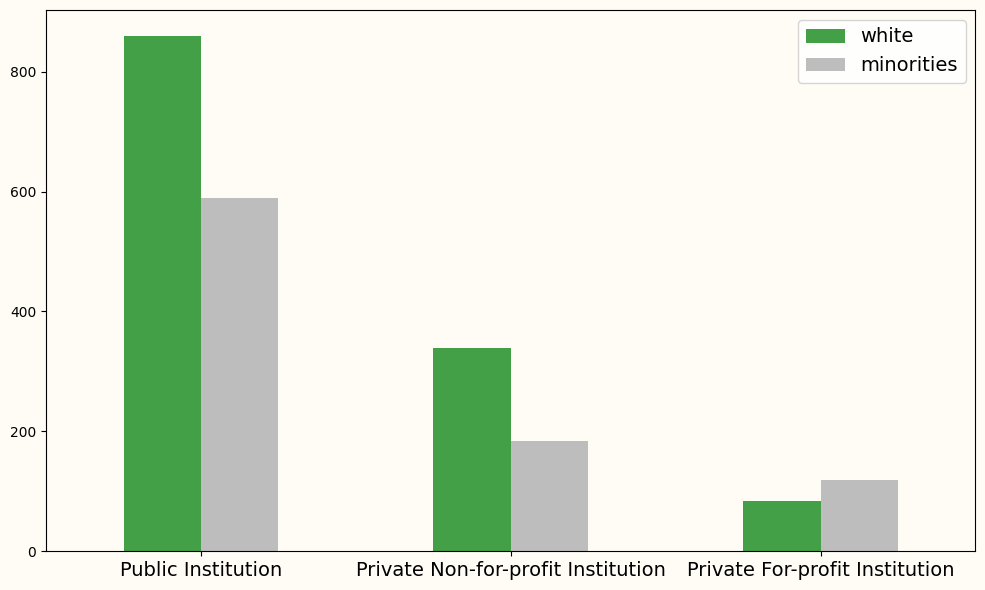

In [15]:
# Create a copy of the original df in case we combine notebooks into one
df = merged_df.copy()

df['minorities'] = (
        df['awards_native_american_total'] +
        df['awards_asian_total'] +
        df['awards_black_total'] +
        df['awards_hispanic_total'] +
        df['awards_pacific_islander_total']
)

df.rename(columns={'awards_white_total': 'white'}, inplace=True)
grouped_data_mean = df.groupby('control')[['white', 'minorities']].mean()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#FEFCF5')  # Background of the entire figure
ax.set_facecolor('#FEFCF5')         # Background of the plot area

grouped_data_mean = grouped_data_mean[['white', 'minorities']]  # ensure column order
grouped_data_mean.plot(
    kind='bar',
    ax=ax,
    color=['#43A047', '#BDBDBD'],  # white (green), minorities (gray)
    legend=True
)


ax.set_xticklabels([
    "Public Institution",
    "Private Non-for-profit Institution",
    "Private For-profit Institution"
], rotation=0, fontsize=14)
ax.grid(False)
ax.set_xlabel('')
ax.set_title('')
ax.legend(fontsize=14)

plt.tight_layout()
plt.show()

#### HBCU vs Non-HBCU
General Idea of where do students graduate more often based whether they study in a HBCU or Non-HBCU

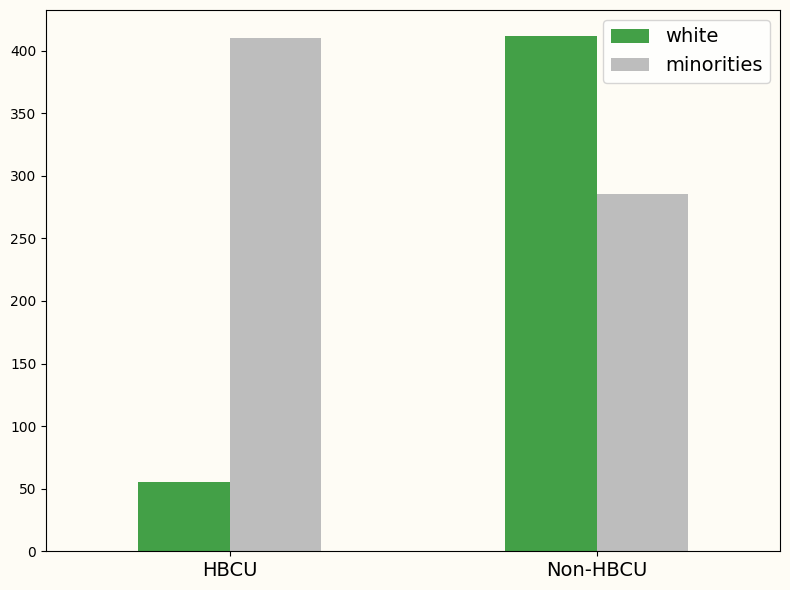

In [17]:
minority_cols = [
    'awards_native_american_total',
    'awards_asian_total',
    'awards_black_total',
    'awards_hispanic_total',
    'awards_pacific_islander_total'
]
non_minority_col = 'awards_white_total'

# Data prep
merged_df['minorities'] = merged_df[minority_cols].sum(axis=1)
merged_df['white'] = merged_df[non_minority_col]
merged_df['hbcu_status'] = merged_df['hbcu'].map({1: 'HBCU', 2: 'Non-HBCU'})
grouped_data_mean = merged_df.groupby('hbcu_status')[['white', 'minorities']].mean()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#FEFCF5')  # Background of the entire figure
ax.set_facecolor('#FEFCF5')         # Background of the plot area

grouped_data_mean = grouped_data_mean[['white', 'minorities']]  # Ensure column order
grouped_data_mean.plot(
    kind='bar',
    ax=ax,
    color=['#43A047', '#BDBDBD'],  # white (green), minorities (gray)
    legend=True
)

ax.set_xticklabels(["HBCU", "Non-HBCU"], rotation=0, fontsize=14)
ax.grid(False)
ax.set_xlabel('')
ax.set_title('')
ax.legend(fontsize=14)

plt.tight_layout()
plt.show()

#### HBCU vs Control Type
Viz of how many institutions of various control types are also HBCU

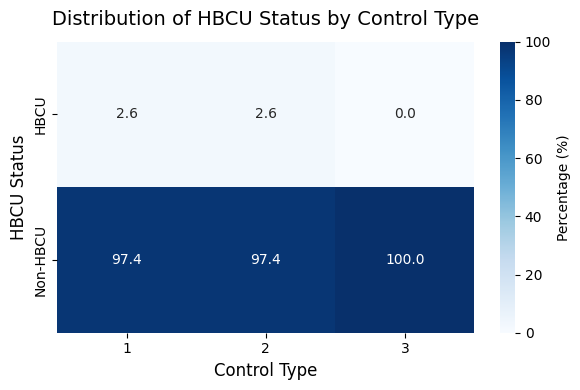

In [19]:
merged_df['hbcu_status'] = merged_df['hbcu'].map({1: 'HBCU', 2: 'Non-HBCU'})

# Create a cross-tab by (hbcu_status x control)
# normalize columns => each column sums to 1.0, so you get % distribution within each control type
counts = pd.crosstab(merged_df['hbcu_status'], merged_df['control'])
counts_perc = counts.div(counts.sum(axis=0), axis=1) * 100  # convert to percentages

# 3) Plot heatmap
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(
    data=counts_perc,
    cmap='Blues',
    annot=True,
    fmt='.1f',          # one decimal place
    vmin=0, vmax=100,
    cbar_kws={'label': 'Percentage (%)'}
)

ax.set_title('Distribution of HBCU Status by Control Type', fontsize=14, pad=12)
ax.set_xlabel('Control Type', fontsize=12)
ax.set_ylabel('HBCU Status', fontsize=12)

plt.tight_layout()
plt.show()

#### Location
General Idea of where do students graduate more often based on the state the university is located

In [22]:
state_awards = df.groupby('state')[['minorities', 'white']].mean().reset_index()

# Map for minorities graduates
fig_minorities = px.choropleth(
    state_awards,
    locations="state",
    locationmode="USA-states",
    color="minorities",
    color_continuous_scale="Greens",
    scope="usa",
    title="Average Awards for Minority Students by State"
)
fig_minorities.show()

# Map for white graduates
fig_white = px.choropleth(
    state_awards,
    locations="state",
    locationmode="USA-states",
    color="white",
    color_continuous_scale="Blues",
    scope="usa",
    title="Average Awards for White Students by State"
)
fig_white.show()